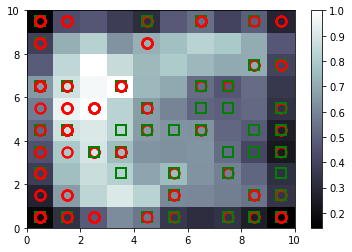

In [91]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len =15, sigma = 1.0, learning_rate = 0.2)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 300)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
plt.show()

# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(8,1)]), axis = 0)


[[0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.]]
Average Number of frauds: 0.38


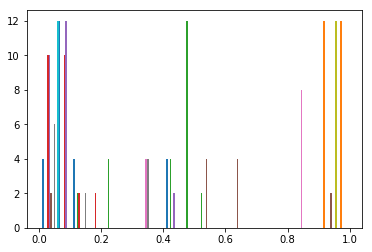

In [93]:
plt.hist(frauds)
frauds.view()

print(frauds.round())
print('Average Number of frauds: {:.2f}'.format(frauds.mean()))


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Logistic regression for its class probablity use
reg = LogisticRegression(n_jobs=-1,tol=.0000099,verbose=True,
                         random_state=12,warm_start=True,C=.75,max_iter=500,
                        solver='sag')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)
reg.fit(X_train,y_train)
reg.score(X_test,y_test)


convergence after 31 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


0.8647342995169082

In [105]:
reg.predict(X_test)

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [118]:
pd.DataFrame(X_test[:10])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.678303,1.0,0.037594,0.000000,0.0,0.384615,0.375,0.008772,0.0,0.0,0.000000,0.0,0.5,0.030,0.00000
1,0.971089,1.0,0.267970,0.375000,0.5,1.000000,0.375,0.228070,1.0,0.0,0.000000,0.0,0.5,0.000,0.00000
2,0.402769,1.0,0.152932,0.023750,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.050,0.00000
3,0.438323,1.0,0.443609,0.107143,0.5,0.769231,0.875,0.210526,1.0,1.0,0.164179,0.0,0.5,0.040,0.00000
4,0.386319,0.0,0.223008,0.133929,0.5,0.538462,0.375,0.008772,0.0,1.0,0.014925,1.0,0.5,0.020,0.00154
5,0.786176,1.0,0.109023,0.171071,0.0,0.615385,0.375,0.078947,1.0,1.0,0.014925,1.0,0.5,0.040,0.00300
6,0.182614,1.0,0.166617,0.098214,0.5,0.538462,0.375,0.078947,1.0,1.0,0.089552,0.0,0.5,0.092,0.00600
7,0.555782,1.0,0.162857,0.482143,0.0,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.5,0.092,0.00000
8,0.393338,1.0,0.211729,0.035714,0.0,0.076923,0.875,0.105263,0.0,0.0,0.000000,0.0,0.5,0.088,0.00537
9,0.239408,1.0,0.265714,0.553571,0.5,0.538462,0.375,0.017544,1.0,0.0,0.000000,0.0,0.5,0.060,0.00000


In [119]:
pd.DataFrame(reg.predict(X_test[:10]))

,0
0,0
1,1
2,0
3,1
4,0
5,1
6,1
7,0
8,0
9,1
